# Bike Sharing System

Bike sharing systems are transportation services that provide bicycles for shared use on a short-term basis. They operate in urban areas, allowing users to rent a bike from one location and return it to another within the system's network. Users can access bikes through automated kiosks or mobile apps, paying for rentals through subscription plans or per-use fees. Bike sharing promotes cycling as a convenient, healthy, and environmentally friendly transportation option in many cities worldwide.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import os

# Import machine learning models
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Import visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Hypothesis

The demand for bike sharing services in Washington, D.C. can be influenced by various factors such as weather conditions, time of day, day of the week, and possibly special events or holidays.

* **Weather Conditions**: The demand for bike sharing services can be affected by weather conditions. People are more likely to rent bikes on pleasant days, such as sunny and mild days, compared to days with extreme weather conditions like rain or snow. Therefore, we can expect a positive correlation between bike rental demand and favorable weather conditions.

* **Time of Day**: Bike rental demand varies with the time of day. There is higher demand for bikes during commuting hours, when people are traveling to and from work or school, compared to other times of the day. This suggests that the time of day is an important factor to consider when predicting bike rental demand.

* **Day of the Week**: Bike rental demand varies by the day of the week. There is higher demand for bikes on weekends, when people have more leisure time and may use bikes for recreational activities, compared to weekdays. This indicates that the day of the week is another important factor to consider when predicting bike rental demand.

* **Special Events or Holidays**: Bike rental demand may be influenced by special events or holidays. For example, there may be higher demand for bikes during festivals, sporting events, or other special occasions when people are more likely to be out and about. This suggests that the occurrence of special events or holidays should be taken into account when predicting bike rental demand.

# Understanding Dataset


The dataset includes hourly rental data for two years (2011 and 2012). The training dataset covers the first 19 days of each month, and the test dataset covers the period from the 20th day to the end of each month. The goal is to predict the total count of bikes rented during each hour in the test set.

In the training dataset, bike demand is given separately for registered and casual users, with the total count being the sum of both. The training dataset has 12 variables, while the test dataset has 9 variables, excluding registered, casual, and count.

- **datetime**:   date and hour in "mm/dd/yyyy hh:mm" format
- **season**:     Four categories-> 1 = spring, 2 = summer, 3 = fall, 4 = winter
- **holiday**:    whether the day is a holiday or not (1/0)
- **workingday**: whether the day is neither a weekend nor holiday (1/0)
- **weather**:    Four Categories of weather
                  1-> Clear, Few clouds, Partly cloudy
                  2-> Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
                  3-> Light Snow and Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
                  4-> Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**:       hourly temperature in Celsius
- **atemp**:      "feels like" temperature in Celsius
- **humidity**:   relative humidity
- **windspeed**:  wind speed
- **casual**:     number of casual users
- **registered**: number of registered users
- **count**:      total number of bikes rented

Here, **casual**, **registered** and **count** are independent variables.

# Exploratory data analysis

Let's load data and assign a new column called **data_set** to distingush where its taken from.

In [2]:
# Set the path to the Kaggle input directory
input_dir = '/kaggle/input/bike-sharing-demand/'

# Load the training data
train_data = pd.read_csv(os.path.join(input_dir, 'train.csv'))

# Add a column to indicate this data is from the training set
train_data['data_set'] = 'train'

# Display the first 5 rows of the training data
train_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [3]:
# Load the test data
test_data = pd.read_csv(os.path.join(input_dir, 'test.csv'))

# Add a column to indicate this data is from the test set
test_data['data_set'] = 'test'

# Display the first 5 rows of the test data
test_data.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,data_set
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,test
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,test
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,test
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,test


From above we can see that **test_data** is missing **casual**, **registered** and **count** columns. Let's add those value and see the combined results.

In [4]:
# Make a copy of the test_df to avoid modifying the original data
test_df_copy = test_data.copy()


# Add the necessary columns to the test_df_copy
test_df_copy['registered'] = 0
test_df_copy['casual'] = 0
test_df_copy['count'] = 0

# Combine the train_df and modified test_df_copy into all_df
all_df = pd.concat([  train_data,test_df_copy], ignore_index=True)

# Display the first 5 rows of the combined DataFrame
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


Let's examine the columns we have in our combined dataframe

In [5]:
all_df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'data_set'],
      dtype='object')

Let's create a new column for the time series analysis. It will be parsed from the existing **datetime** column and will be index by specific time range.

In [6]:
# Create a DatetimeIndex from the 'datetime' column
dt = pd.DatetimeIndex(all_df['datetime'])

# Set the index of all_df to the DatetimeIndex
all_df.set_index(dt, inplace=True)

# Display the first 5 rows of all_df with the new DatetimeIndex
all_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,train
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train
2011-01-01 04:00:00,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,train


In [7]:
# Sort the DatetimeIndex in increasing order
# all_df.sort_index(inplace=True)

# Select rows from all_df that fall within the time range from '2011-01-01 01:00:00' to '2011-01-01 03:00:00'
# all_df['2011-01-01 01:00:00':'2011-01-01 03:00:00']
# Select rows from all_df that fall within the time range from '2011-01-01 01:00:00' to '2011-01-01 03:00:00'
all_df.loc[(all_df.index >= '2011-01-01 01:00:00') & (all_df.index <= '2011-01-01 03:00:00')]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,data_set
datetime,,,,,,,,,,,,,
2011-01-01 01:00:00,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,train
2011-01-01 02:00:00,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,train
2011-01-01 03:00:00,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,train


Let's draw histogram plots to understand the distribution of numerical variables and generate a frequency table for numeric variables of the independent variables 

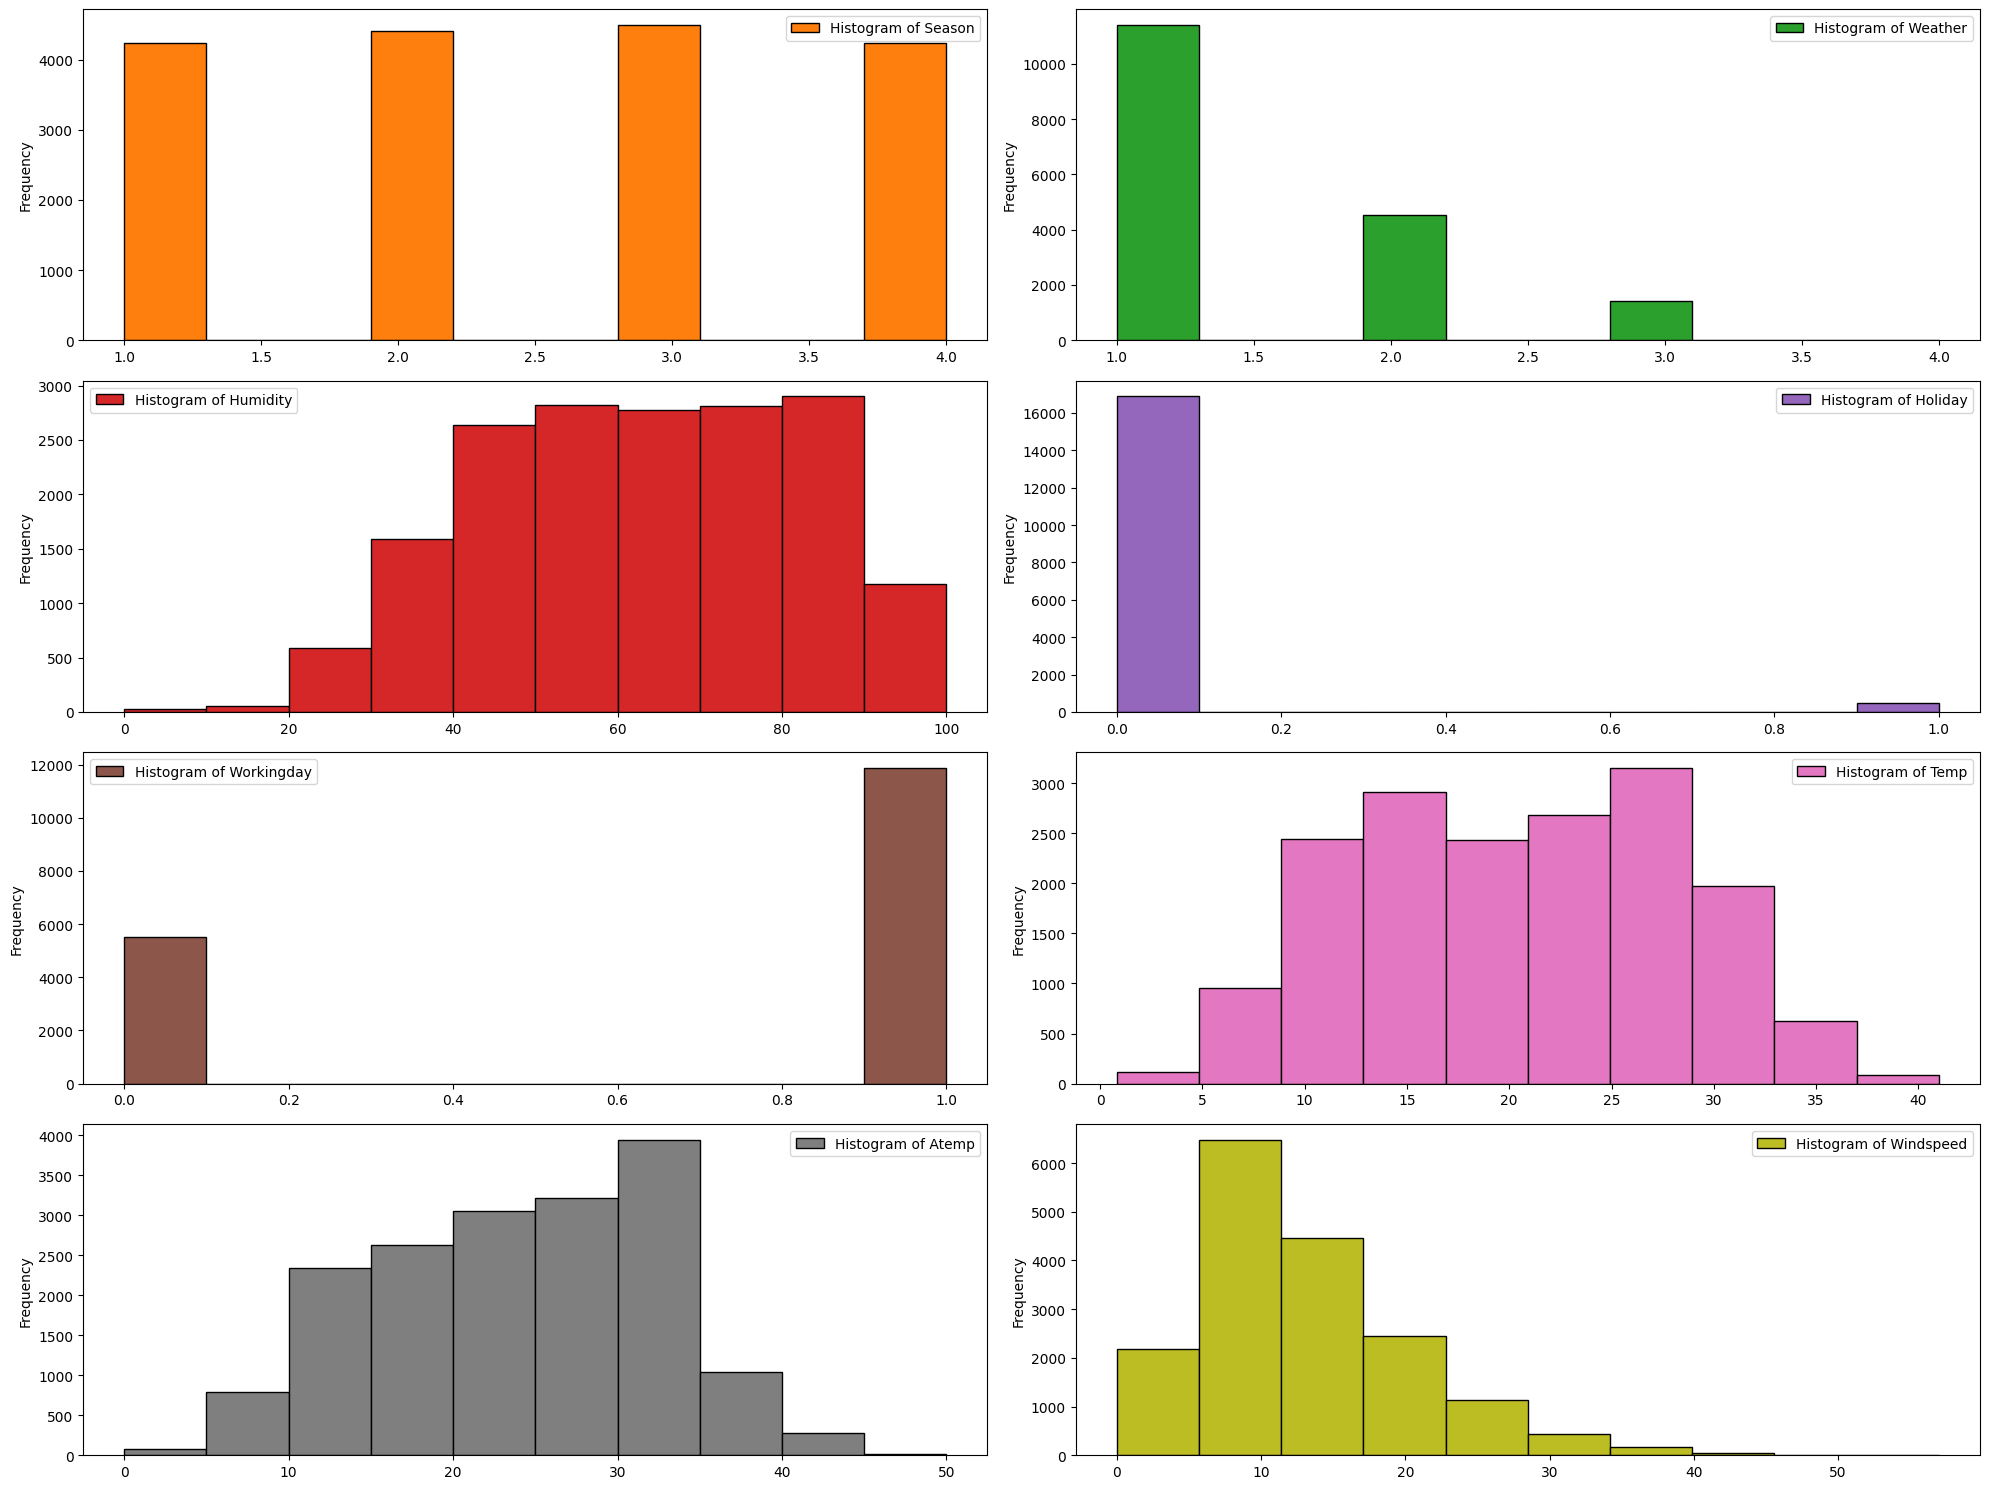

In [8]:
# Columns for which histograms need to be plotted
numeric_cols = ['season', 'weather', 'humidity', 'holiday', 'workingday', 'temp', 'atemp', 'windspeed']

# Define the figure size
plt.figure(figsize=(20, 15))

# Loop through the numeric columns and plot histograms
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(4, 2, i)
    all_df[col].plot.hist(bins=10, color='C'+str(i), label=f'Histogram of {col.capitalize()}', edgecolor='black')
    plt.legend(loc='best')

# Adjust the layout
plt.tight_layout()

**Inferences from these Histograms**
- **Season**: The distribution of seasons appears to be relatively even, with each season having a similar frequency in the dataset.
- **Weather**: Category 1 (mostly clear weather) has the highest frequency, indicating that clear weather is the most common condition in the dataset.
- **Working Day and Holiday**: Most days are working days, with fewer holidays. This is expected, as holidays are typically fewer in number compared to regular working days.
- **Temperature (temp and atemp)**: The temperature variables (temp and atemp) appear to be approximately normally distributed, which is expected for temperature data.
- **Humidity**: The distribution of humidity values appears to be somewhat skewed, but without more context or a specific distribution in mind, it's difficult to make a definitive statement about its distribution.
- **Windspeed**: The windspeed data also appears to be somewhat skewed, with higher frequencies at lower windspeeds and a long tail towards higher windspeeds.



Let's perform the logarithmic transformation of dependent cols. The is done to normalize skewed distributions and make them more symmetrical. 

In [9]:
# Create new columns for log-transformed values
for col in ['casual', 'registered', 'count']:
    all_df[f'{col}_log'] = np.log(all_df[col] + 1)


In [10]:
# Parse datetime column and extract date-related features
all_df['date'] = dt.date
all_df['day'] = dt.day
all_df['month'] = dt.month
all_df['year'] = dt.year
all_df['hour'] = dt.hour
all_df['dow'] = dt.dayofweek

In [11]:
# How many columns have null values
all_df.isnull().sum()

datetime          0
season            0
holiday           0
workingday        0
weather           0
temp              0
atemp             0
humidity          0
windspeed         0
casual            0
registered        0
count             0
data_set          0
casual_log        0
registered_log    0
count_log         0
date              0
day               0
month             0
year              0
hour              0
dow               0
dtype: int64

In [12]:
# Columns to interpolate
columns_to_interpolate = ["weather", "temp", "atemp", "humidity", "windspeed"]

# Interpolate the columns
for col in columns_to_interpolate:
    all_df[col] = all_df[col].interpolate(method='time')
    if col in ["weather", "humidity"]:
        all_df[col] = all_df[col].apply(np.round)

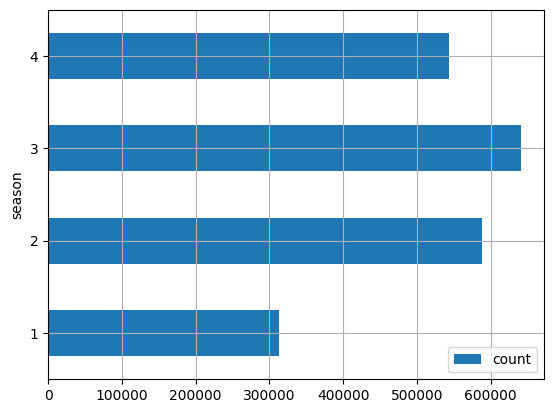

In [13]:
# Calculate count_season using groupby and join
by_season = all_df.loc[all_df['data_set'] == 'train', ['season', 'count']].groupby('season').sum()
by_season['count'] = by_season['count'].astype(int)  # Convert the sum to integer
all_df = all_df.merge(by_season, how='left', on='season', suffixes=('', '_season'))

# Plot the count_season
by_season.plot(kind='barh')
plt.grid(True)
plt.show()

Let's differentiate workingdays and holidays from the combined dataframe.

In [14]:
# def get_day(day_start):
#     day_end = day_start + pd.offsets.DateOffset(hours=23)
#     return pd.date_range(day_start, day_end, freq="h")
all_df['datetime'] = pd.to_datetime(all_df['datetime'])

dates = [
    (pd.Timestamp(2011, 4, 15), 1, 0),  # Tax day
    (pd.Timestamp(2012, 4, 16), 1, 0),  # Tax day
    (pd.Timestamp(2011, 11, 25), 0, 1),  # Thanksgiving Friday
    (pd.Timestamp(2012, 11, 23), 0, 1),  # Thanksgiving Friday
    (pd.Timestamp(2012, 5, 21), 0, 1),  # Storms
    (pd.Timestamp(2012, 6, 1), 0, 1)  # Tornado
]

for date, workingday_value, holiday_value in dates:
    all_df.loc[all_df['datetime'].dt.date == date.date(), 'workingday'] = workingday_value
    all_df.loc[all_df['datetime'].dt.date == date.date(), 'holiday'] = holiday_value
# for date, workingday, holiday in dates:
#     all_df.loc[get_day(date)[0], "workingday"] = workingday
#     all_df.loc[get_day(date)[0], "holiday"] = holiday



In [15]:
all_df.head(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,casual_log,registered_log,count_log,date,day,month,year,hour,dow,count_season
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,...,1.386294,2.639057,2.833213,2011-01-01,1,1,2011,0,5,312498
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,...,2.197225,3.496508,3.713572,2011-01-01,1,1,2011,1,5,312498
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,...,1.791759,3.332205,3.496508,2011-01-01,1,1,2011,2,5,312498
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,...,1.386294,2.397895,2.639057,2011-01-01,1,1,2011,3,5,312498
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,...,0.000000,0.693147,0.693147,2011-01-01,1,1,2011,4,5,312498
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0,...,0.000000,0.693147,0.693147,2011-01-01,1,1,2011,5,5,312498
6,2011-01-01 06:00:00,1,0,0,1,9.02,13.635,80,0.0000,2,...,1.098612,0.000000,1.098612,2011-01-01,1,1,2011,6,5,312498
7,2011-01-01 07:00:00,1,0,0,1,8.20,12.880,86,0.0000,1,...,0.693147,1.098612,1.386294,2011-01-01,1,1,2011,7,5,312498
8,2011-01-01 08:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,0.693147,2.079442,2.197225,2011-01-01,1,1,2011,8,5,312498
9,2011-01-01 09:00:00,1,0,0,1,13.12,17.425,76,0.0000,8,...,2.197225,1.945910,2.708050,2011-01-01,1,1,2011,9,5,312498


In [16]:
by_hour = all_df[all_df['data_set'] == 'train'].copy().groupby(['hour', 'workingday'])['count'].agg('sum').unstack()
by_hour.head(10)


workingday,0,1
hour,,
0,13719,11369
1,10418,4954
2,7670,2589
3,3670,1421
4,1236,1596
5,1325,7610
6,2860,31838
7,6720,90248
8,16074,148986


Let's plot the chart to see the hourly demand trends. 

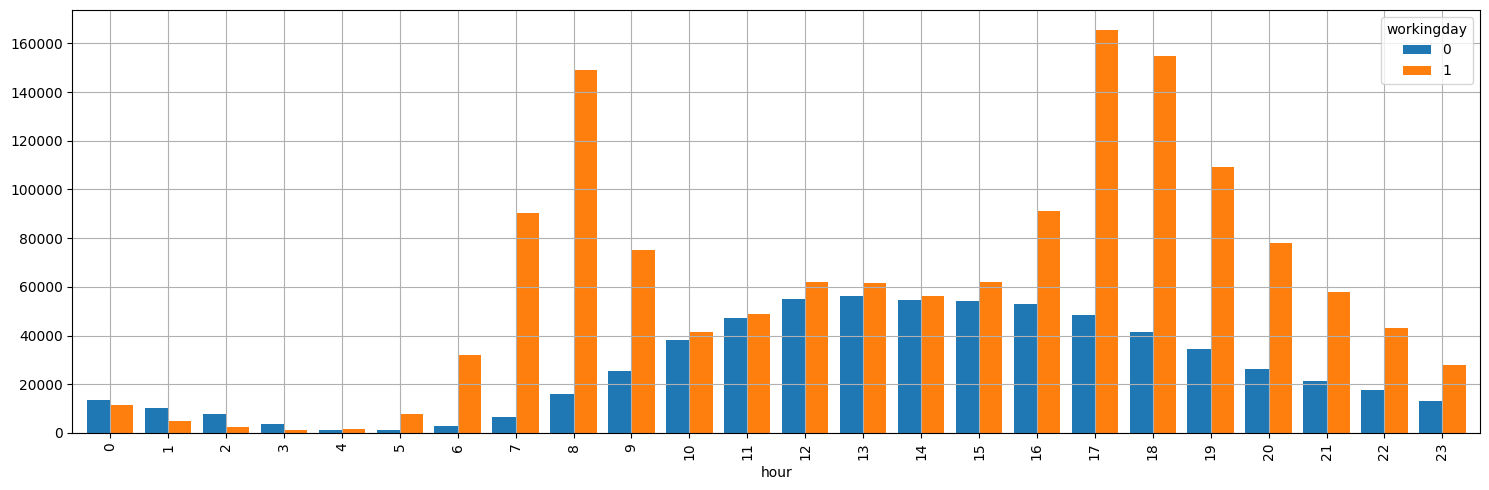

In [17]:
# rentals by hour, split by working day (or not)
by_hour.plot(kind='bar', figsize=(15, 5), width=0.8, grid=True)
plt.tight_layout()
plt.show()

# Hypothesis Testing

We have gained a good understanding of the dataset so far. Now, let's test the hypotheses we generated earlier. We've added some additional hypotheses from the dataset. Let's test them one by one:

- **Hourly trend**: Although the dataset does not include the 'hour' variable, we extracted it using the datetime column. Let's plot the hourly trend of the count over hours and verify our hypothesis. We will separate the train and test datasets from the combined dataset.

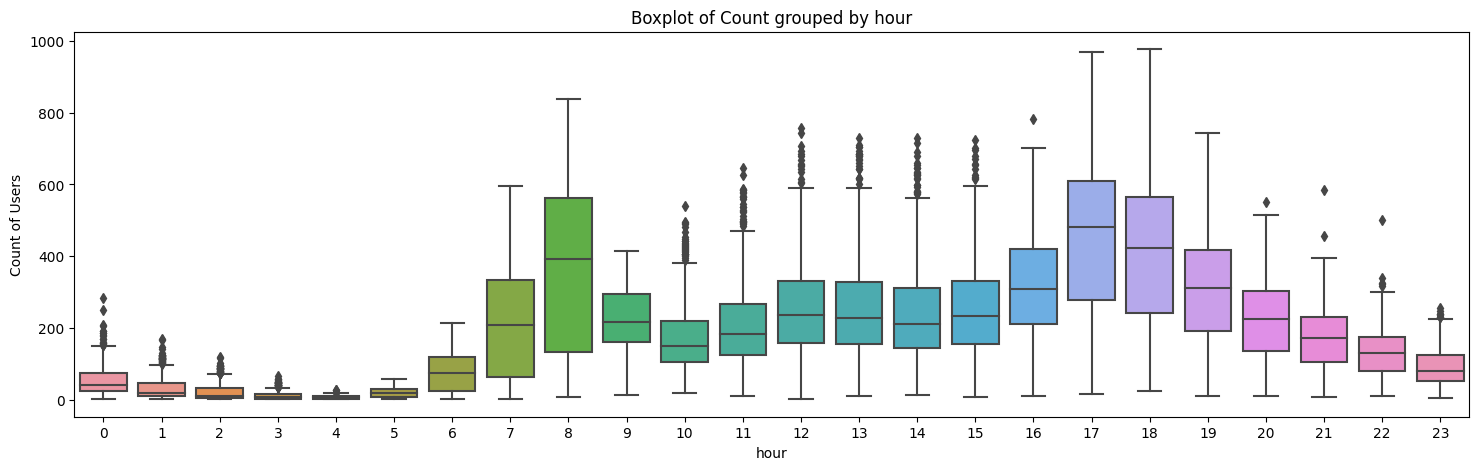

In [18]:
train_df = all_df[all_df['data_set'] == 'train'].copy()
plt.figure(figsize=(18, 5))
sns.boxplot(x=train_df['hour'], y=train_df['count'])
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by hour");

We observed a clear trend in bike demand over hours. Next, we'll categorize the demand into three groups:

- High demand: 7-9 and 17-19 hours
- Average demand: 10-16 hours
- Low demand: 0-6 and 20-24 hours

This analysis is based on the distribution of total bike demand.


- **Good Weather**: Let's examine weather factor. Summer and Winter are generally associated with more frequent bad weather, while Spring experiences the most frequent normal weather. Good weather is most prevalent in Fall.

In [19]:
season_map = {1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
good_weather = all_df.loc[all_df['weather'] == 1, ['hour', 'season']].copy()
data = good_weather.groupby(['hour', 'season']).size().reset_index(name='count')
data['season'] = data['season'].map(season_map)


Good Weather - Fall

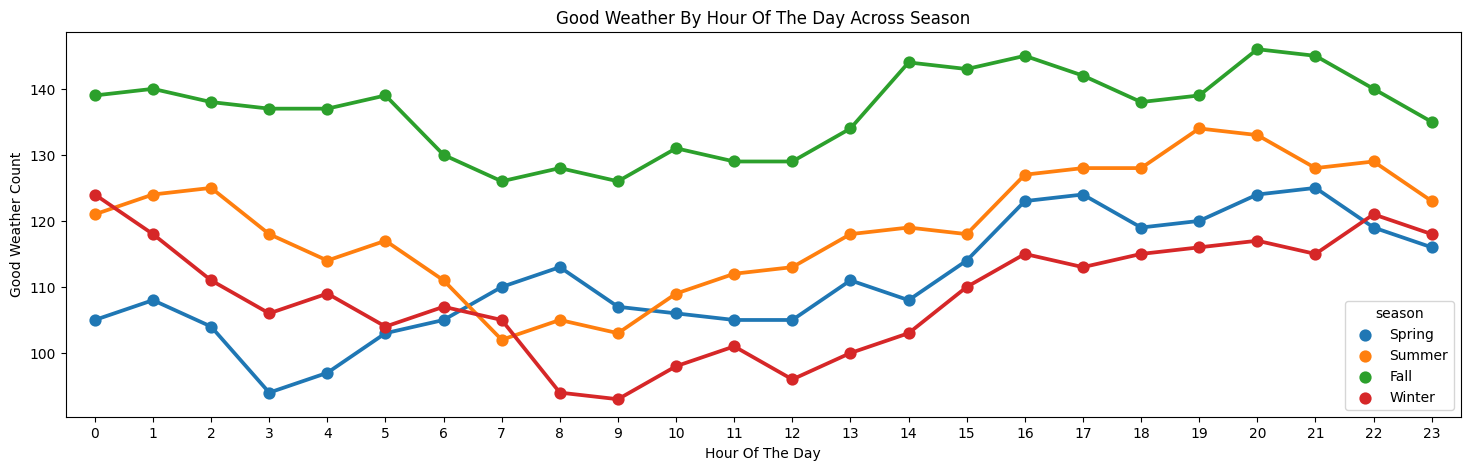

In [20]:
plt.figure(figsize=(18, 5))
sns.pointplot(data=data, x='hour', y='count', hue='season')
plt.xlabel('Hour Of The Day')
plt.ylabel('Good Weather Count')
plt.title('Good Weather By Hour Of The Day Across Season')
plt.show()

Good Weather - Spring

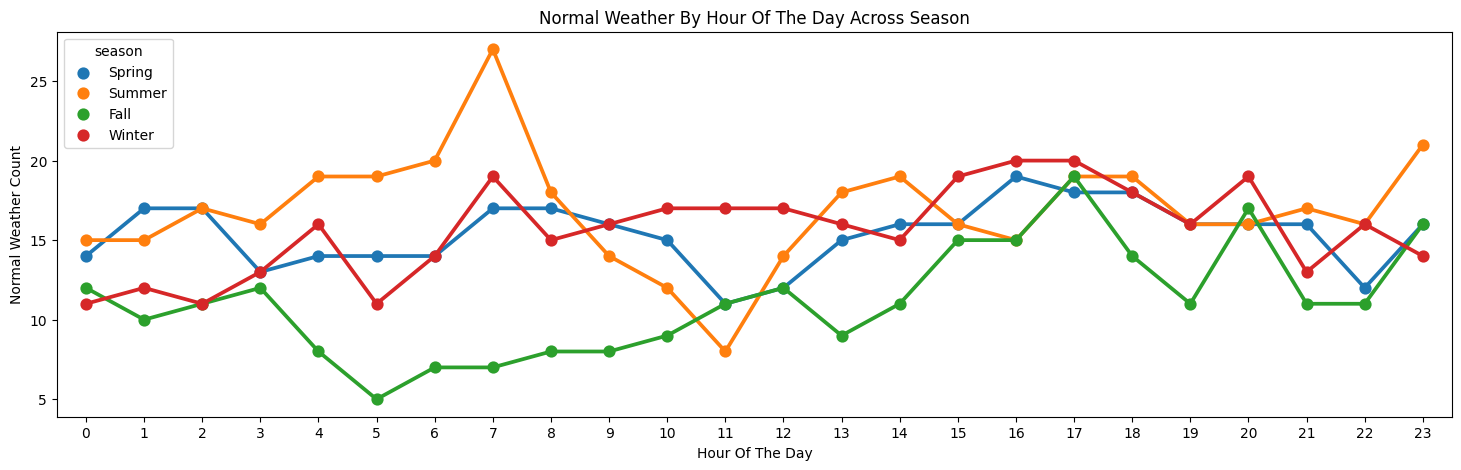

In [21]:
normal_weather = all_df.loc[all_df['weather'] == 3, ['hour', 'season']].copy()
data = normal_weather.groupby(['hour', 'season']).size().reset_index(name='count')
data['season'] = data['season'].map(season_map)

plt.figure(figsize=(18, 5))
sns.pointplot(data=data, x='hour', y='count', hue='season')
plt.xlabel('Hour Of The Day')
plt.ylabel('Normal Weather Count')
plt.title('Normal Weather By Hour Of The Day Across Season')
plt.show()

Let's plot the normal weather by hour of the day across the season

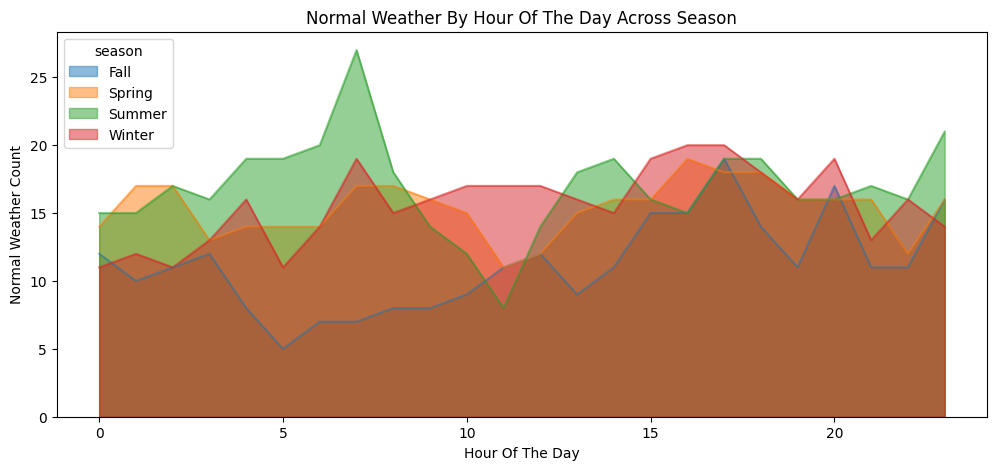

In [22]:
data = pd.pivot_table(data, values='count', columns='season', index='hour')
fig, ax = plt.subplots(figsize=(12, 5))
data.plot.area(stacked=False, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Normal Weather Count', title="Normal Weather By Hour Of The Day Across Season");

Bad weather happens in Summer and Winter

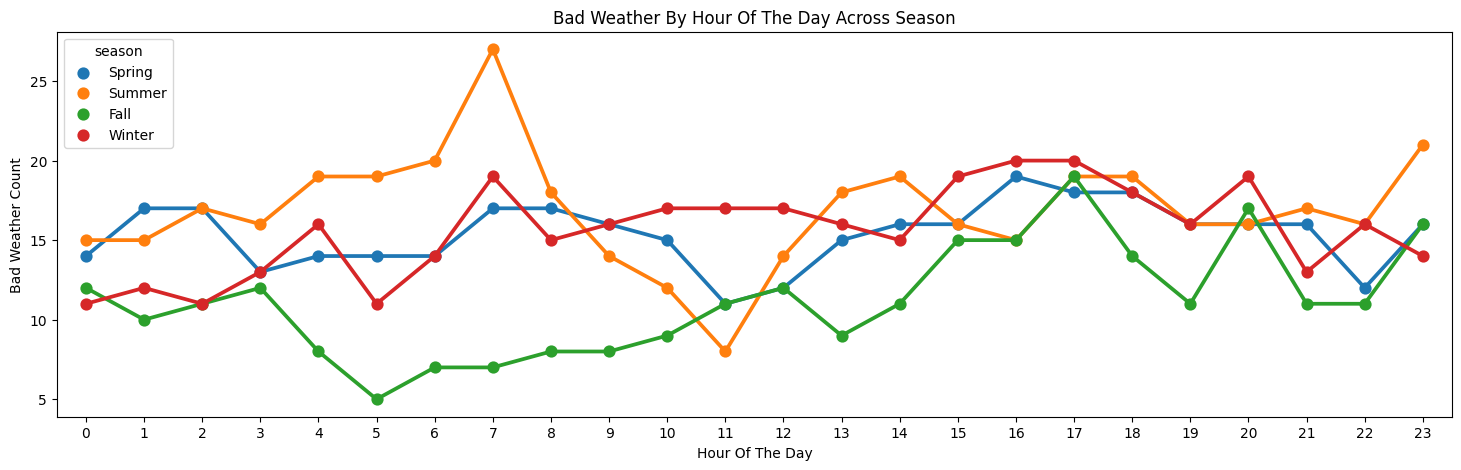

In [23]:
bad_weather = all_df[all_df['weather'] == 3][['hour', 'season']].copy()
data = pd.DataFrame({'count' : bad_weather.groupby(["hour","season"]).size()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Bad Weather Count', title="Bad Weather By Hour Of The Day Across Season");

Let's explore the relationship between bikes rented in both good and bad weather. 

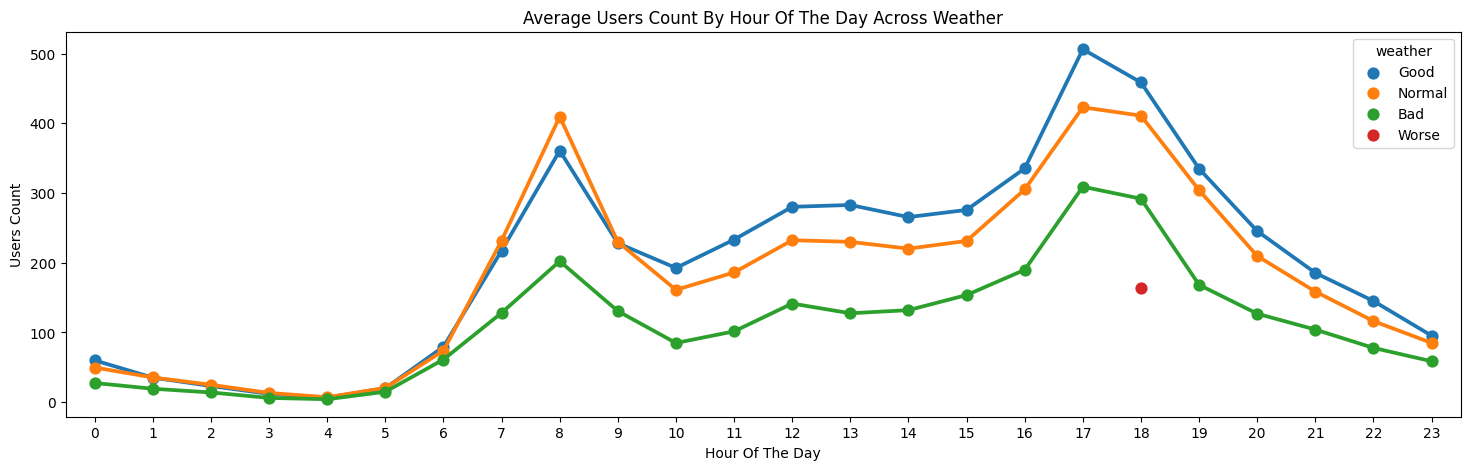

In [24]:
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}
data = pd.DataFrame(train_df.groupby(["hour","weather"], sort=True)["count"].mean()).reset_index()
data['weather'] = data['weather'].map(lambda d : weather_map[d])
fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["count"], hue=data["weather"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weather");

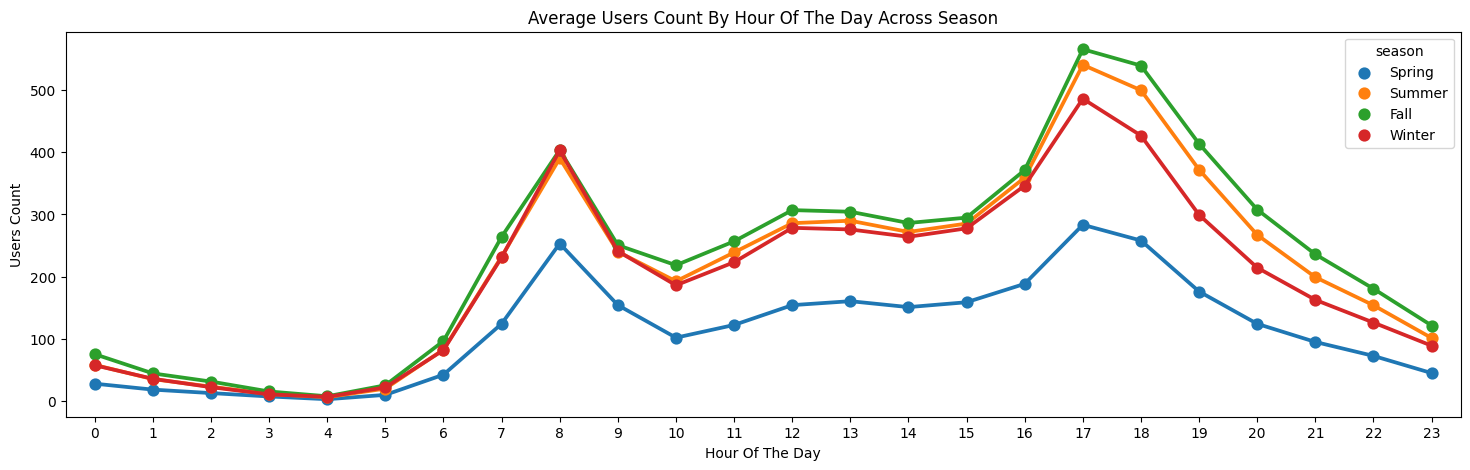

In [25]:
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}
data = pd.DataFrame({'mean':train_df.groupby(["hour","season"], sort=True)["count"].mean()}).reset_index()
data['season'] = data['season'].map(lambda d : season_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["season"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Season");

From above, we can see that bikes are rented more in good weather and more in Fall season. Now, let's see when they are rented most.

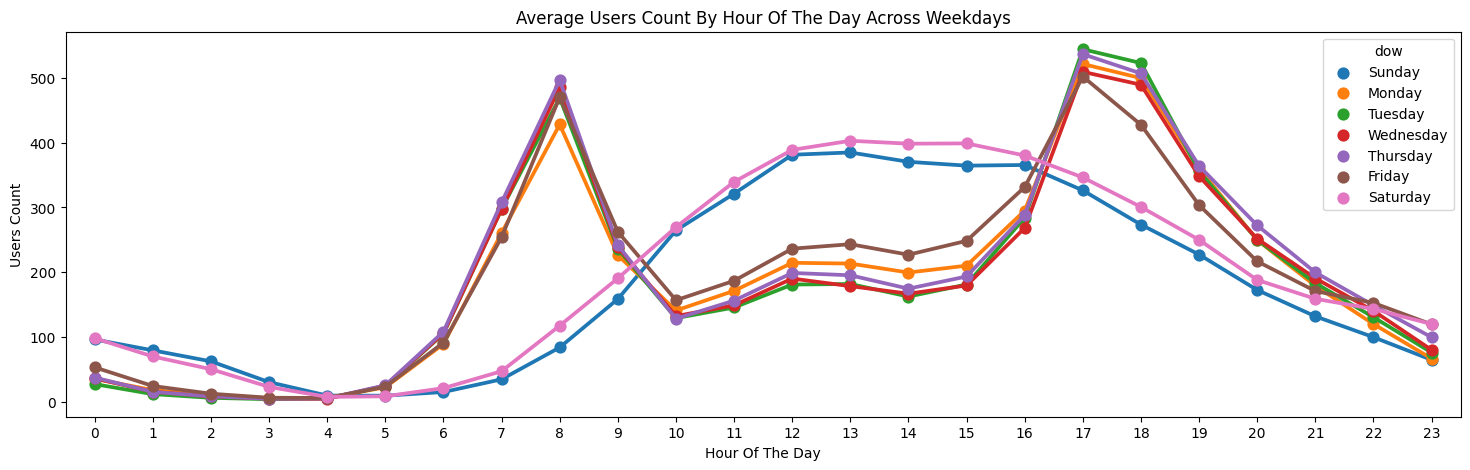

In [26]:
day_map = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]
data = pd.DataFrame({'mean':train_df.groupby(["hour","dow"], sort=True)["count"].mean()}).reset_index()
data['dow'] = data['dow'].map(lambda d : day_map[d])

fig, ax = plt.subplots(figsize=(18, 5))
sns.pointplot(x=data["hour"], y=data["mean"], hue=data["dow"], hue_order=hueOrder, ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays");


### Relationship between users
In our dataset we have two users: registered and casual. Let's explore there renting patterns.

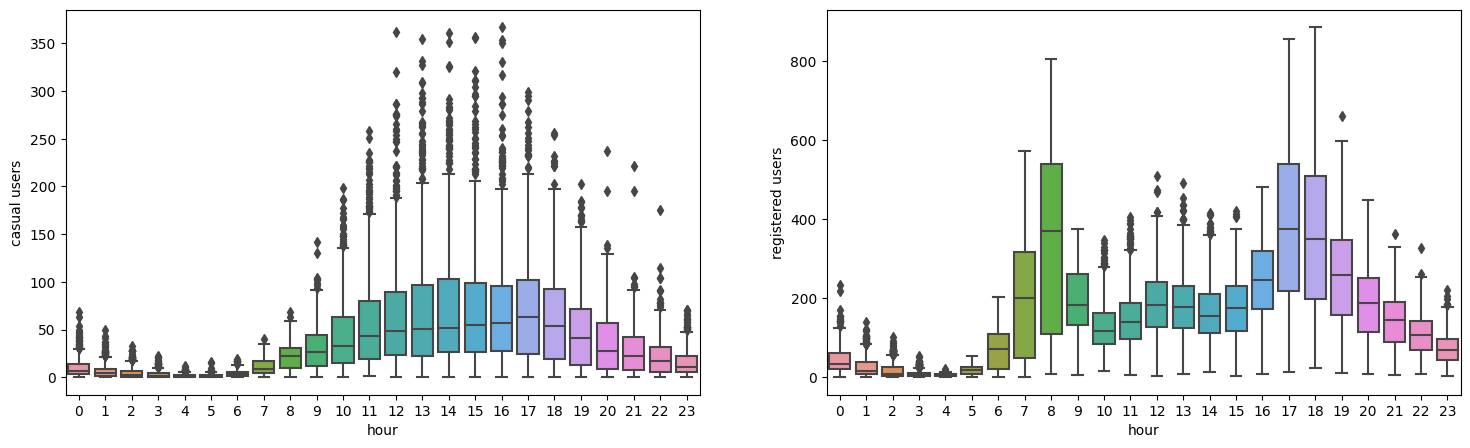

In [27]:
fig, axs = plt.subplots(1, 2, figsize=(18,5), sharex=False, sharey=False)

sns.boxplot(x='hour', y='casual', data=train_df, ax=axs[0])
axs[0].set_ylabel('casual users')
axs[0].set_title('')

sns.boxplot(x='hour', y='registered', data=train_df, ax=axs[1])
axs[1].set_ylabel('registered users')
axs[1].set_title('');

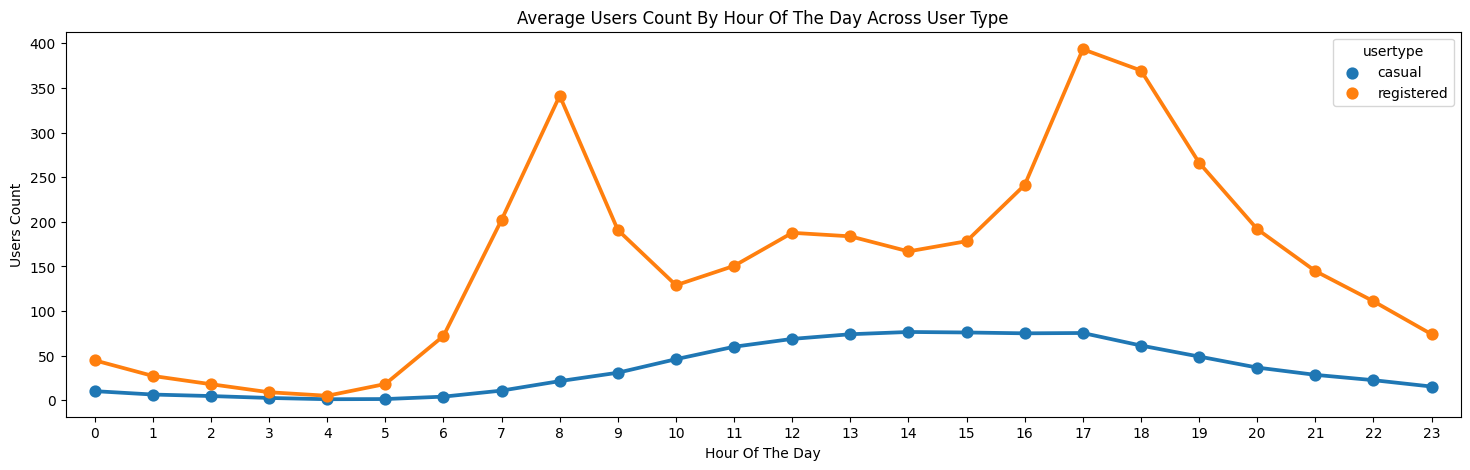

In [28]:
fig, ax = plt.subplots(figsize=(18, 5))
train_df_melt = pd.melt(train_df[["hour","casual","registered"]], id_vars=['hour'], value_vars=['casual', 'registered'], var_name='usertype', value_name='count')
data = pd.DataFrame(train_df_melt.groupby(["hour", "usertype"], sort=True)["count"].mean()).reset_index()
sns.pointplot(x=data["hour"], y=data["count"], hue=data["usertype"], hue_order=["casual","registered"], ax=ax)
ax.set(xlabel='Hour Of The Day', ylabel='Users Count', title='Average Users Count By Hour Of The Day Across User Type');

Based on the plots, we can conclude that the registered users exhibit a similar trend to the total count of users, while casual users show a different trend. This suggests that the 'hour' variable is significant, confirming our hypothesis.

However, there are many outliers in the plots of registered and casual user counts. These outliers are not errors but natural occurrences, possibly indicating groups of people who are not registered users. To address these outliers, we will apply a logarithmic transformation and examine the plots again to see the effect of this transformation.

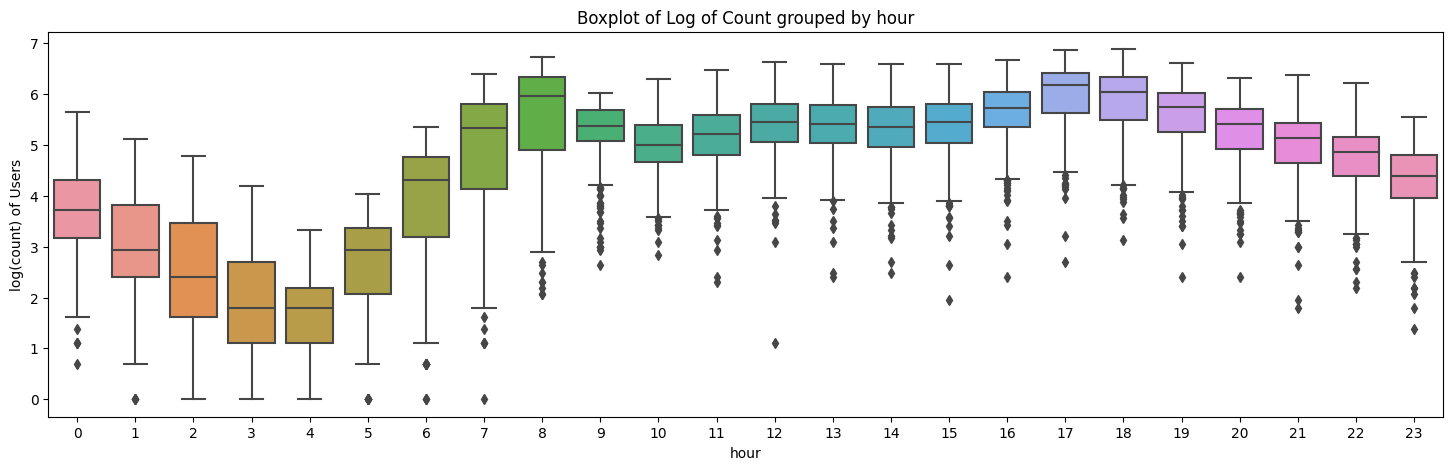

In [29]:
train_df = train_df.assign(log_count = lambda df : np.log(train_df['count']))

fig, ax = plt.subplots(figsize=(18, 5))
sns.boxplot(x='hour', y='log_count', data=train_df, ax=ax)
ax.set(ylabel='log(count) of Users',title='Boxplot of Log of Count grouped by hour')

#plt.suptitle("") # get rid of the pandas autogenerated title
train_df.drop(['log_count'], axis = 1, inplace=True);

When plotting a categorical variable against a continuous variable, a scatter plot can be helpful for visualizing their distributions. However, when the points are closely clustered, the plot may appear as a smear, making it difficult to interpret. To address this, we can add jitter, which involves adding a small random amount to each data point along the categorical axis. For example, a categorical value vector [1, 2, 2, 2, 1, 3] might become [1.05, 1.96, 2.05, 2, 0.97, 2.95] after jitter is applied. This ensures that the points are slightly spread out, creating a cloud of points that better represents the distribution. Let's examine at which time bikers rented more bike in workdays

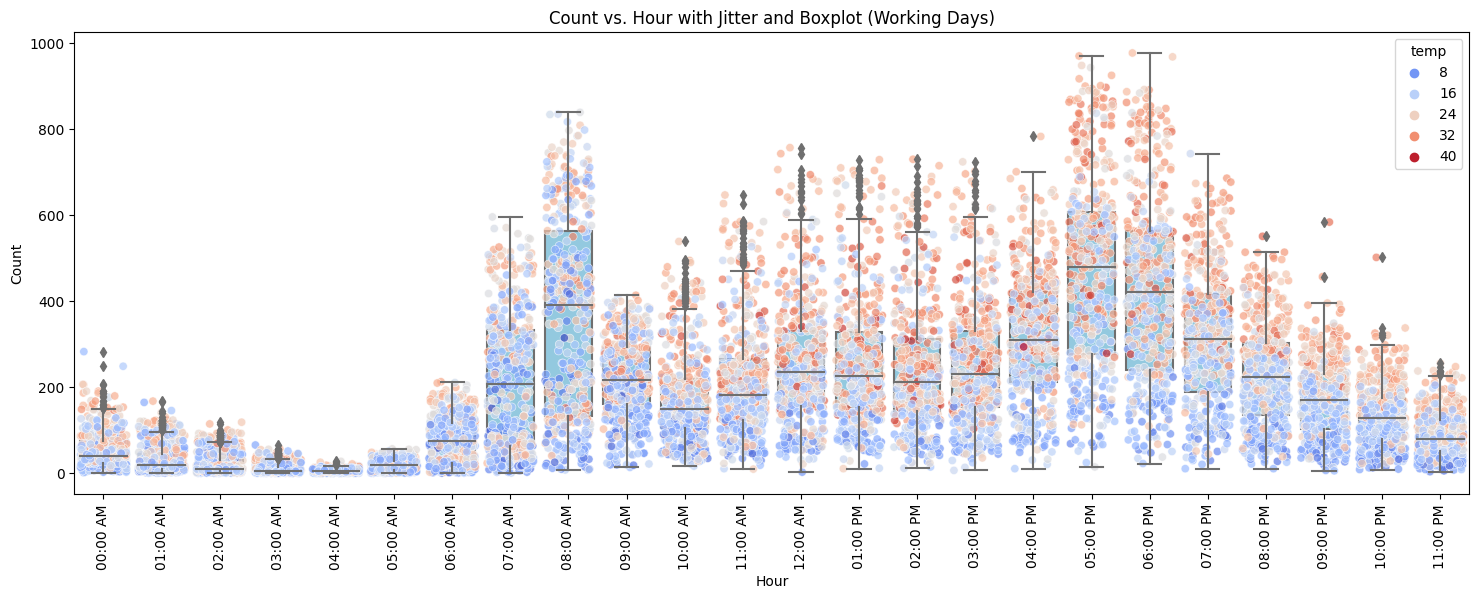

In [30]:
# Function to add jitter
def hour_jitter(h):
    return h + np.random.uniform(-0.4, 0.4)

# Function to format hour
def hour_format(h):
    return "{:02d}:00 AM".format(int(h)) if h <= 12 else "{:02d}:00 PM".format(int(h) % 12)

# Generate data
train_df['hour_jitter'] = train_df['hour'].map(hour_jitter)

# Plot
plt.figure(figsize=(18, 6))
sns.boxplot(x=train_df['hour'], y=train_df['count'], ax=plt.gca(), color='skyblue')
sns.scatterplot(x=train_df['hour_jitter'], y=train_df['count'], hue=train_df['temp'], palette='coolwarm', ax=plt.gca(), alpha=0.7)

# Format x-axis labels
hours = np.unique(train_df['hour'].values)
hour_labels = [hour_format(h) for h in hours]
plt.xticks(hours, hour_labels, rotation='vertical')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Count')
plt.title('Count vs. Hour with Jitter and Boxplot (Working Days)')

# Show plot
plt.show()

From above plot we can see that on workdays most bikers rented bikes in warm mornings and evenings. Let's examine the daily trends of different users.

In [31]:
# Drop the 'hour_jitter' column from the DataFrame

train_df.drop('hour_jitter', axis=1, inplace=True); 

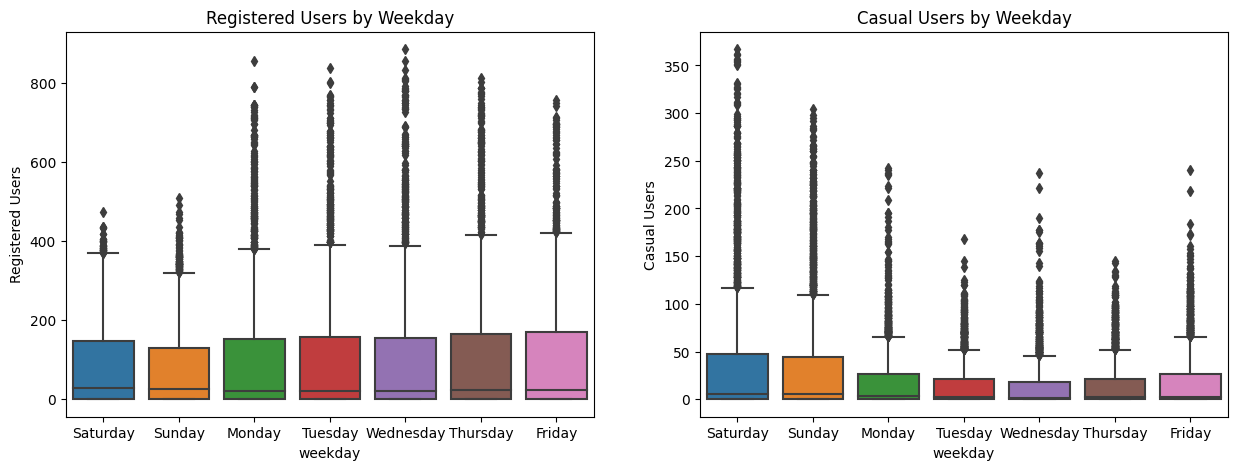

In [32]:
# Map the day of the week (dow) to the corresponding weekday name
dayOfWeek = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
all_df['weekday'] = all_df['dow'].map(dayOfWeek)

# Create a figure with two subplots for boxplots of registered and casual users by weekday
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

# Boxplot for registered users
sns.boxplot(x='weekday', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('Registered Users')
axs[0].set_title('Registered Users by Weekday')

# Boxplot for casual users
sns.boxplot(x='weekday', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('Casual Users')
axs[1].set_title('Casual Users by Weekday')

# Remove the 'weekday' column from the DataFrame
all_df.drop('weekday', axis=1, inplace=True);


- **Rain**: To analyze the impact of rain on bike demand, we'll use the **weather** variable. According to the variable description, weather code 3 represents light rain and code 4 represents heavy rain. Let's visualize this relationship:

Text(0.5, 1.0, '')

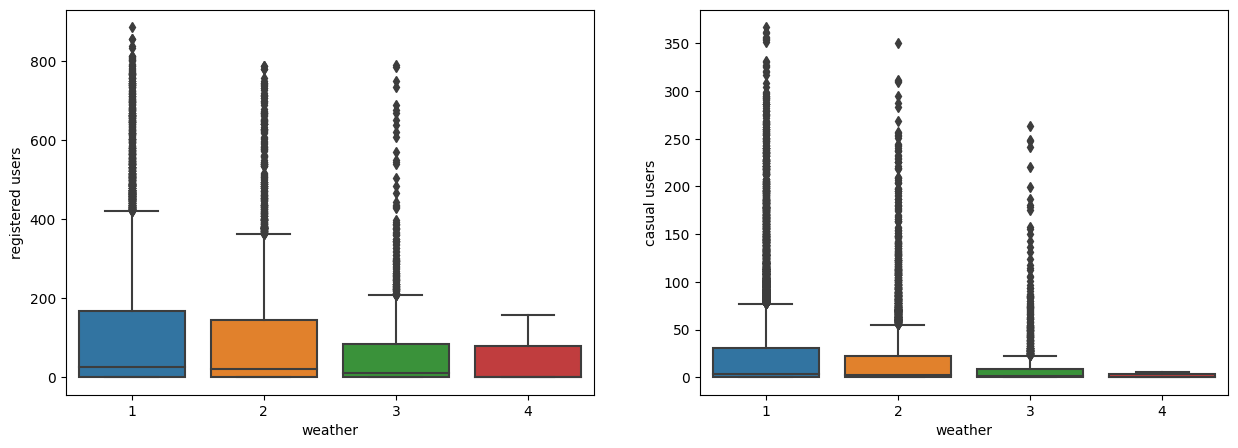

In [33]:
# Visualize the distribution of registered and casual users based on weather conditions
fig, axs = plt.subplots(1, 2, figsize=(15,5), sharex=False, sharey=False)

# Boxplot for registered users
sns.boxplot(x='weather', y='registered', data=all_df, ax=axs[0])
axs[0].set_ylabel('registered users')
axs[0].set_title('')

# Boxplot for casual users
sns.boxplot(x='weather', y='casual', data=all_df, ax=axs[1])
axs[1].set_ylabel('casual users')
axs[1].set_title('')


The above plot clearly supports our hypothesis.

- **Temperature, Windspeed and Humidity**: These are continuous variables so, we can look at the correlation factor to validate hypothesis.

In [34]:
# Calculate and visualize the correlation matrix for selected features
sub_df = train_df[['count', 'registered', 'casual', 'temp', 'atemp', 'humidity', 'windspeed', 'workingday', 'holiday']]
sub_df.corr()

,count,registered,casual,temp,atemp,humidity,windspeed,workingday,holiday
count,1.000000,0.970948,0.690414,0.394454,0.389784,-0.317371,0.101369,0.012456,-0.008049
registered,0.970948,1.000000,0.497250,0.318571,0.314635,-0.265458,0.091052,0.120111,-0.023038
casual,0.690414,0.497250,1.000000,0.467097,0.462067,-0.348187,0.092276,-0.317953,0.040464
temp,0.394454,0.318571,0.467097,1.000000,0.984948,-0.064949,-0.017852,0.029104,0.002969
atemp,0.389784,0.314635,0.462067,0.984948,1.000000,-0.043536,-0.057473,0.024029,-0.003455
humidity,-0.317371,-0.265458,-0.348187,-0.064949,-0.043536,1.000000,-0.318607,-0.014381,0.012114
windspeed,0.101369,0.091052,0.092276,-0.017852,-0.057473,-0.318607,1.000000,0.016610,-0.000585
workingday,0.012456,0.120111,-0.317953,0.029104,0.024029,-0.014381,0.016610,1.000000,-0.241584
holiday,-0.008049,-0.023038,0.040464,0.002969,-0.003455,0.012114,-0.000585,-0.241584,1.000000


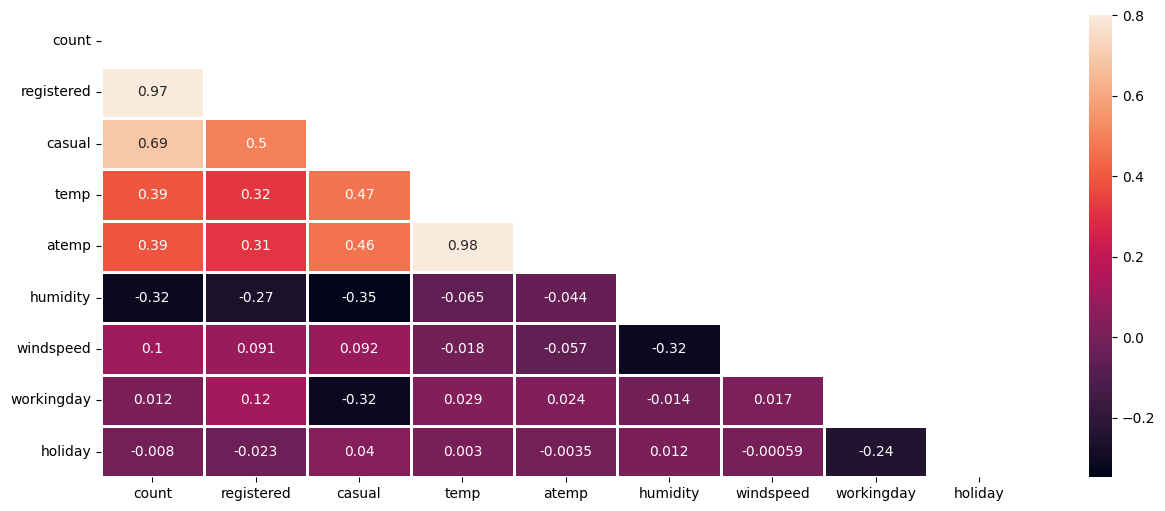

In [35]:
corrMatt = sub_df.corr()
mask = np.zeros_like(corrMatt)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(corrMatt, mask=mask, vmax=.8, square=False, annot=True, ax=ax, linewidths=1);

Histogram Inferences

- **Temperature (temp)**: Positively correlated with the number of casual users, indicating more casual users prefer to bike when it's warmer.
- **Feels-like Temperature (atemp)**: Highly correlated with temp, suggesting a strong relationship between perceived and actual temperature.
- **Windspeed**: Has a lower correlation compared to temp and humidity, indicating it might have less impact on bike demand.

- **Time**: Let's extract the year from the **datetime** column and analyze the trend of bike demand over the years.

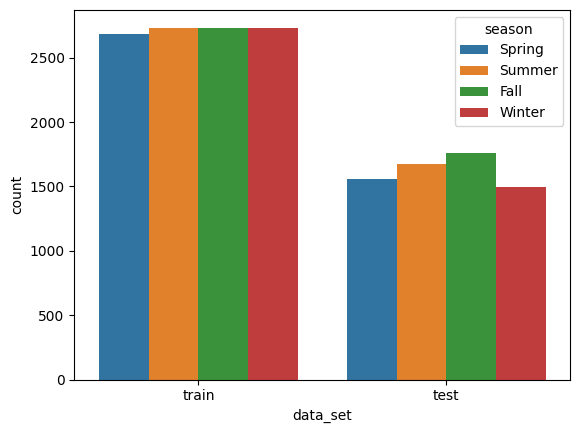

In [36]:
# Map season numbers to season names
season_map = {1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'}

# Create a copy of the dataframe with only the 'data_set' and 'season' columns
data = all_df[['data_set', 'season']].copy()

# Fill NaN values in the 'season' column with a default value
data['season'] = data['season'].fillna(0)

# Map season numbers to season names, handling NaN values
data['season'] = data['season'].map(lambda d : season_map.get(d, 'Unknown'))

# Filter out 'Unknown' values
data = data[data['season'] != 'Unknown']

# Create a count plot
sns.countplot(x="data_set", hue="season", data=data);



Let's explore the data distribution between train and test set based on weather.

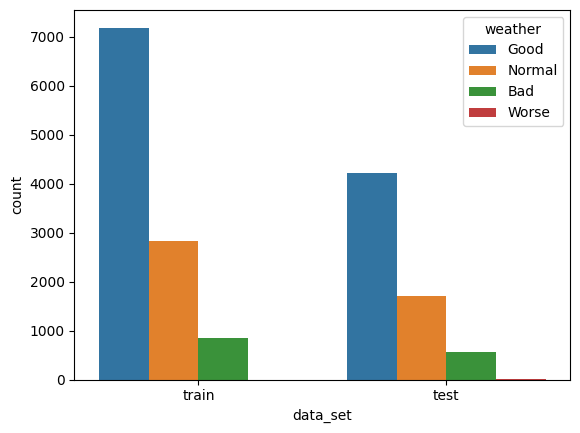

In [37]:
# Map weather numbers to weather descriptions
weather_map = {1:'Good', 2:'Normal', 3:'Bad', 4:'Worse'}

# Create a copy of the dataframe with only the 'data_set' and 'weather' columns
data = all_df[['data_set', 'weather']].copy()

# Fill NaN values in the 'weather' column with a default value
data['weather'] = data['weather'].fillna(0)

# Map weather numbers to weather descriptions, handling NaN values
data['weather'] = data['weather'].map(lambda d : weather_map.get(d, 'Unknown'))

# Filter out 'Unknown' values
data = data[data['weather'] != 'Unknown']

# Create a count plot
sns.countplot(x="data_set", hue="weather", data=data);


Lets explore the distribution of users on train and test set based on year.

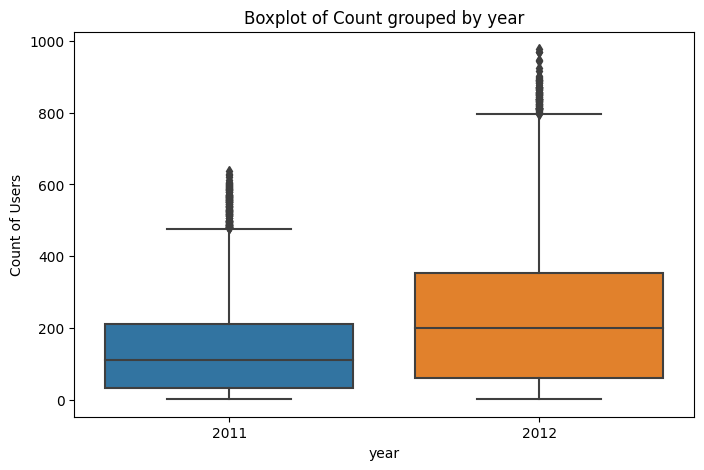

In [38]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='year', y='count', data=train_df)
plt.ylabel('Count of Users')
plt.title("Boxplot of Count grouped by year");

From above we can see that the bike demand was more in 2012 than 2011.

# Feature Engineering

Feature engineering is the process of creating new features (variables) from existing data that can help improve the performance of machine learning models. We will introduce new variables to enhance the predictive capability of our model. 

1. **'peak' column:** It indicates whether the hour is a peak hour or not. Peak hours are defined differently for working days and non-working days.

2. **'holiday' column:** It marks specific dates as holidays, such as October 30, 2012, for Sandy, and December 24, 26, and 31 for Christmas and others.

3. **'workingday' column:** It adjusts the working day status for December 24 and 31 to be non-working days.

4. **'ideal' column:** It identifies whether the weather is ideal based on temperature and windspeed.

5. **'sticky' column:** It flags whether the humidity is high on working days.

In [39]:
# feature engineer a new column indicating whether it's a peak hour or not
all_df['peak'] = all_df[['hour', 'workingday']]\
    .apply(lambda df: 1 if ((df['workingday'] == 1 and (df['hour'] == 8 or 17 <= df['hour'] <= 18)) \
                            or (df['workingday'] == 0 and 10 <= df['workingday'] <= 19)) else 0, axis=1)

# sandy
all_df['holiday'] = all_df[['month', 'day', 'holiday', 'year']]\
    .apply(lambda df: 1 if (df['year'] == 2012 and df['month'] == 10 and df['day'] == 30) else 0, axis=1)

# christmas and others
all_df['holiday'] = all_df[['month', 'day', 'holiday']]\
    .apply(lambda df: 1 if (df['month'] == 12 and df['day'] in [24, 26, 31]) else df['holiday'], axis=1)
all_df['workingday'] = all_df[['month', 'day', 'workingday']]\
    .apply(lambda df: 0 if df['month'] == 12 and df['day'] in [24, 31] else df['workingday'], axis=1)

# from histogram
all_df['ideal'] = all_df[['temp', 'windspeed']]\
    .apply(lambda df: 1 if (df['temp'] > 27 and df['windspeed'] < 30) else 0, axis=1)
    
all_df['sticky'] = all_df[['humidity', 'workingday']]\
    .apply(lambda df: 1 if (df['workingday'] == 1 and df['humidity'] >= 60) else 0, axis=1)


In [40]:
all_df.sample(10)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,...,date,day,month,year,hour,dow,count_season,peak,ideal,sticky
3227,2011-08-04 09:00:00,3,0,1,1,29.52,34.850,74,22.0028,25,...,2011-08-04,4,8,2011,9,3,640662,0,1,1
12198,2011-06-20 16:00:00,2,0,1,1,28.70,32.575,58,11.0014,0,...,2011-06-20,20,6,2011,16,0,588282,0,1,0
5950,2012-02-04 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,1,...,2012-02-04,4,2,2012,3,5,312498,0,0,0
7903,2012-06-09 16:00:00,2,0,0,1,33.62,34.850,24,12.9980,219,...,2012-06-09,9,6,2012,16,5,588282,0,1,0
14681,2012-03-21 23:00:00,2,0,1,1,22.14,25.760,77,0.0000,0,...,2012-03-21,21,3,2012,23,2,588282,0,0,1
533,2011-02-05 09:00:00,1,0,0,3,8.20,11.365,100,6.0032,3,...,2011-02-05,5,2,2011,9,5,312498,0,0,0
3862,2011-09-11 22:00:00,3,0,0,1,25.42,30.305,69,26.0027,21,...,2011-09-11,11,9,2011,22,6,640662,0,0,0
16595,2012-10-20 17:00:00,4,0,0,1,22.14,25.760,37,15.0013,0,...,2012-10-20,20,10,2012,17,5,544034,0,0,0
4615,2011-11-05 09:00:00,4,0,0,1,12.30,13.635,56,19.9995,30,...,2011-11-05,5,11,2011,9,5,544034,0,0,0
9655,2012-10-06 16:00:00,4,0,0,1,24.60,31.060,43,35.0008,317,...,2012-10-06,6,10,2012,16,5,544034,0,0,0


# Model Training
We will be creating a machine learning model to predict for casual and registered users separately and then combine them to generate the overall prediction for the counts.

In [41]:
# instead of randomly splitting our training data 
# for cross validation, let's construct a framework that's more
# in line with how the data is divvied up for this competition
# (given first 19 days of each month, what is demand for remaining days)
# so, let's split our training data into 2 time contiguous datasets
# for fitting and validating our model (days 1-14 vs. days 15-19).

# also, since submissions are evaluated based on the
# root mean squared logarithmic error (RMSLE), let's replicate
# that computation as we test and tune our model.

# Separate the data into training and testing sets
train_df = all_df[all_df['data_set'] == 'train']
test_df = all_df[all_df['data_set'] == 'test']

# Define a function to calculate the Root Mean Squared Logarithmic Error (RMSLE)
def get_rmsle(y_pred, y_actual):
    diff = np.log(y_pred + 1) - np.log(y_actual + 1)
    mean_error = np.square(diff).mean()
    return np.sqrt(mean_error)

# Define a custom function for training and validation set split based on a cutoff day
def custom_train_valid_split(data, cutoff_day=15):
    train = data[data['day'] <= cutoff_day]
    valid = data[data['day'] > cutoff_day]
    return train, valid

# Define a function to prepare the training data with specified input columns
def prep_train_data(data, input_cols):
    X = data[input_cols].values
    y_r = data['registered_log'].values
    y_c = data['casual_log'].values
    return X, y_r, y_c

# Define a function to predict on the validation set and transform the output back from log scale
def predict_on_validation_set(model, input_cols):
    train, valid = custom_train_valid_split(train_df)
    X_train, y_train_r, y_train_c = prep_train_data(train, input_cols)
    X_valid, y_valid_r, y_valid_c = prep_train_data(valid, input_cols)
    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_valid)) - 1
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_valid)) - 1
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    y_actual_comb = np.exp(y_valid_r) + np.exp(y_valid_c) - 2
    rmsle = get_rmsle(y_pred_comb, y_actual_comb)
    return (y_pred_comb, y_actual_comb, rmsle)

# Define a function to predict on the test set and transform the output back from log scale
def predict_on_test_set(model, input_cols):
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)
    X_test = test_df[input_cols].values
    model_c = model.fit(X_train, y_train_c)
    y_pred_c = np.exp(model_c.predict(X_test)) - 1
    model_r = model.fit(X_train, y_train_r)
    y_pred_r = np.exp(model_r.predict(X_test)) - 1
    y_pred_comb = np.round(y_pred_r + y_pred_c)
    y_pred_comb[y_pred_comb < 0] = 0
    return y_pred_comb


We will be be using RandomForestRegressor model and  Root Mean Squared Logarithmic Error (RMSLE) to evaluate the performance of a regression model.


In [42]:
# Define the hyperparameters for the Random Forest model
params = {
    'n_estimators': 1000,  # Number of trees in the forest
    'max_depth': 15,        # Maximum depth of the tree
    'random_state': 0,      # Seed for random number generation
    'min_samples_split': 5, # Minimum number of samples required to split an internal node
    'n_jobs': -1,            # Number of jobs to run in parallel for fitting
    'min_samples_leaf': 10   # Minimum number of samples required to be at a leaf node.
#     '
}

# Initialize the Random Forest Regressor with the specified hyperparameters
rf_model = RandomForestRegressor(**params)

# Specify the columns to be used as features in the Random Forest model
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'peak'
]

# Call the predict_on_validation_set function to make predictions using the Random Forest model
# and calculate the RMSLE on the validation set
(rf_pred, rf_actual, rf_rmsle) = predict_on_validation_set(rf_model, rf_cols)


Let's print the RMSLE value.

In [43]:
print(rf_rmsle)

0.42520791988932255


# Stacking

To create a meta prediction by combining the predictions of multiple models, we can use a technique called stacking, similar to cross-validation. For instance, in 5-fold stacking, we first split the training data into 5 folds. Then, in each of the 5 iterations, we train each base model on 4 folds and predict on the remaining fold, while also predicting on the testing data. This process results in a matrix with the shape #(samples in training data) X #(base models). This matrix is then used as input for a stacker model in the second level. After fitting the stacker, we use the predictions of the base models on the testing data (each base model predicts on the test data, resulting in 5 predictions for the same test data), and take the average to obtain a matrix of the same shape, which gives us our final predictions.

1. **Manual Stacking**: To generate a final prediction, we can stack the predictions of multiple models using a predefined weighted mechanism. This approach involves averaging the predictions of two or more models, rather than relying on a single model's prediction.

2. **Stacking with Linear Regression**: In this scenario, we will train two classifiers using different sets of input columns. Subsequently, we will combine the predictions of these two classifiers using a Linear Regressor. The Linear Regressor serves as a meta-classifier, learning the optimal weighted combination of the predictions from the two level 0 classifiers.

Let's perform manual stacking.

In [44]:
# Predictions using Random Forest and Gradient Boosting models
rf_pred = predict_on_test_set(rf_model, rf_cols)
gbm_pred = predict_on_test_set(rf_model, rf_cols)

# Combined prediction using a manual blend
y_pred = np.round(.2*rf_pred + .8*gbm_pred)

# Creating a DataFrame for submission
submit_manual_blend_df = test_df[['datetime', 'count']].copy()
submit_manual_blend_df['count'] = y_pred

# Saving the submission DataFrame to a CSV file
submit_manual_blend_df.to_csv('submit_manual_blend.csv', index=False)


Now, Let's perform Linear Regression stacking.

In [45]:
# Level 0 RandomForestRegressor
rf_params = {'n_estimators': 1200, 'max_depth': 16, 'random_state': 0, 'min_samples_split': 12, 'n_jobs': -1}
rf_model = RandomForestRegressor(**rf_params)
rf_cols = [
    'weather', 'temp', 'atemp', 'windspeed',
    'workingday', 'season', 'holiday', 'sticky',
    'hour', 'dow', 'peak'
]

# Level 0 GradientBoostingRegressor
gbm_params = {'n_estimators': 150, 'max_depth': 5, 'random_state': 0, 'min_samples_leaf': 10, 'learning_rate': 0.1, 'subsample': 0.9, 'loss': 'squared_error'}
gbm_model = GradientBoostingRegressor(**gbm_params)
gbm_cols = [
    'weather', 'temp', 'atemp', 'humidity', 'windspeed',
    'holiday', 'workingday', 'season',
    'hour', 'dow', 'year', 'ideal', 'count_season',
]

clf_input_cols = [rf_cols, gbm_cols]
clfs = [rf_model, gbm_model]

# Create train and test sets for blending and Pre-allocate the data
blend_train = np.zeros((train_df.shape[0], len(clfs)))
blend_test = np.zeros((test_df.shape[0], len(clfs)))

# For each classifier, we train the classifier with its corresponding input_cols
# and record the predictions on the train and the test set
for clf_index, (input_cols, clf) in enumerate(zip(clf_input_cols, clfs)):

    # prepare training and validation set
    X_train, y_train_r, y_train_c = prep_train_data(train_df, input_cols)

    # prepare testing set
    X_test = test_df[input_cols].values

    model_r = clf.fit(X_train, y_train_r)
    y_pred_train_r = np.exp(model_r.predict(X_train)) - 1
    y_pred_test_r = np.exp(model_r.predict(X_test)) - 1

    model_c = clf.fit(X_train, y_train_c)
    y_pred_train_c = np.exp(model_c.predict(X_train)) - 1
    y_pred_test_c = np.exp(model_c.predict(X_test)) - 1

    y_pred_train_comb = np.round(y_pred_train_r + y_pred_train_c)
    y_pred_train_comb[y_pred_train_comb < 0] = 0

    y_pred_test_comb = np.round(y_pred_test_r + y_pred_test_c)
    y_pred_test_comb[y_pred_test_comb < 0] = 0

    blend_train[:, clf_index] = y_pred_train_comb
    blend_test[:, clf_index] = y_pred_test_comb


In [46]:
# Level 1 Belending Classifier using LinearRegression
from sklearn.linear_model import LinearRegression
bclf = LinearRegression(fit_intercept=False)
bclf.fit(blend_train, train_df['count'])

# What is the weighted combination of the base classifiers?
bclf.coef_



array([0.17221014, 0.86648005])

In [47]:
# Stacked and Blending predictions
y_pred_blend = np.round(bclf.predict(blend_test))

# R^2 score
bclf.score(blend_train, train_df['count'])



0.9613126862022181

Let's plot the predictions of each model 

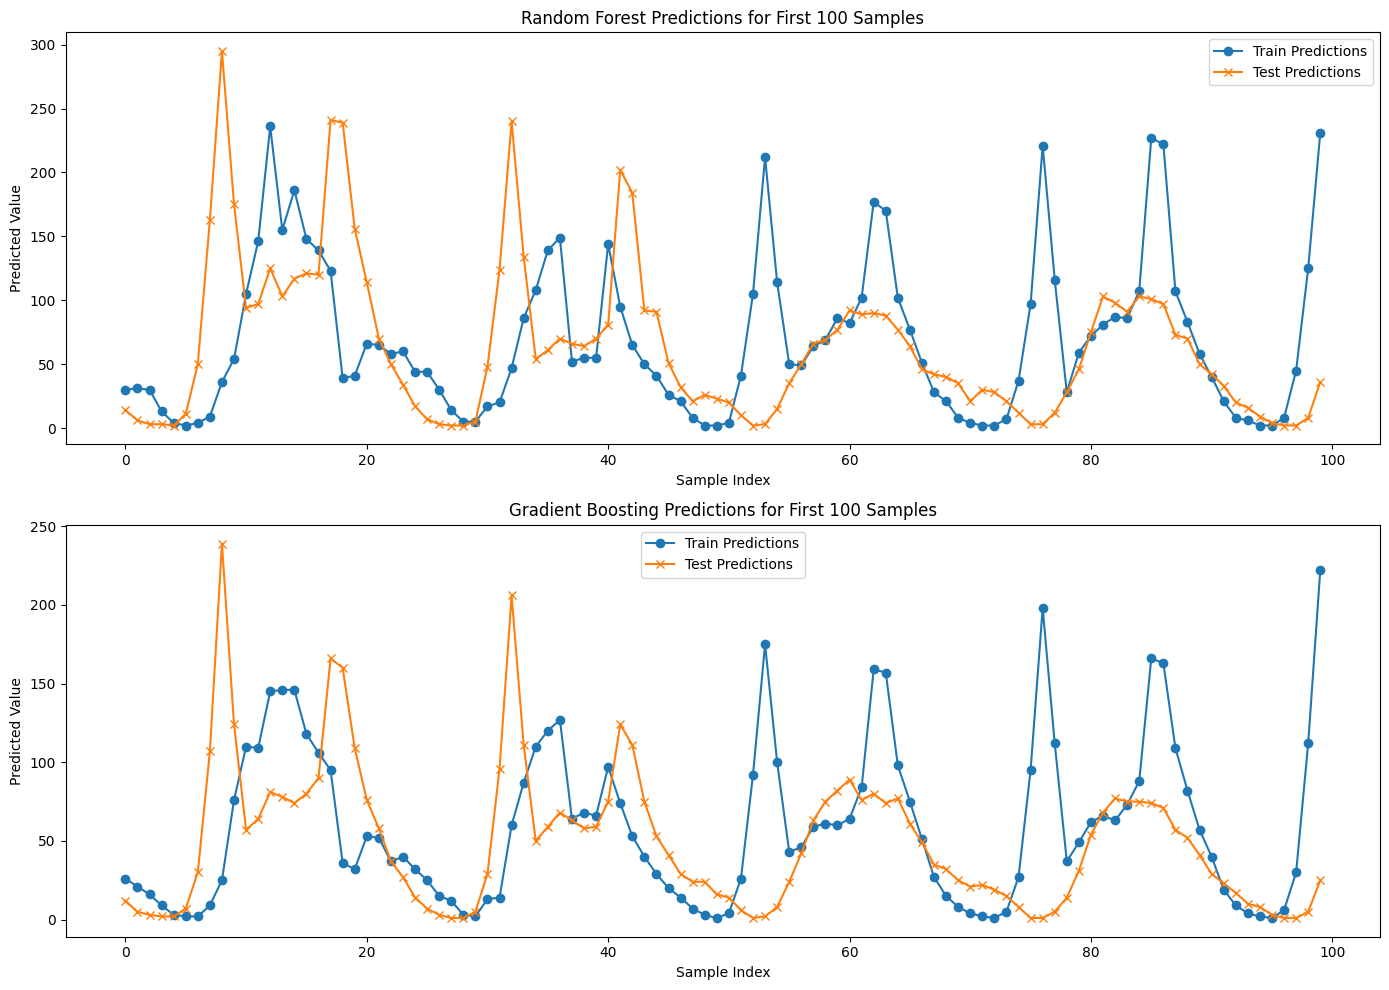

In [48]:
# Plot predictions for each model for the first 100 samples
plt.figure(figsize=(14, 10))
for clf_index, clf_name in enumerate(['Random Forest', 'Gradient Boosting']):
    plt.subplot(2, 1, clf_index+1)
    plt.plot(np.arange(100), blend_train[:100, clf_index], label='Train Predictions', marker='o')
    plt.plot(np.arange(100), blend_test[:100, clf_index], label='Test Predictions', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('Predicted Value')
    plt.title(f'{clf_name} Predictions for First 100 Samples')
    plt.legend()

plt.tight_layout()
plt.show()

In [49]:
# output predictions for submission
submit_stack_blend_df = test_df[['datetime', 'count']].copy()
submit_stack_blend_df['count'] = y_pred_blend
submit_stack_blend_df.to_csv('submission.csv', index=False)


# Conclusion

From the above experiment we found that bikes are rented more in good weather, mostly in fall season. It is rented mostly in morning/evening on weekdays and mostly for daytime rides on weekends. We also explored various correlation between temperature, windspeed and humidity. A machine learning model is also developed using RandomForestRegressor and it's accuracy was evaluated. The concept of manual and linear regression stacking was also disscued.  
